In [6]:
#import hd5py
import numpy as np
import random
from scipy.spatial import distance

Create query data

In [100]:
xq = [79.4, 79.2, 79.1,79.0, 78.8, 78.6]
yq = [-23.1, -22.6,-22.4, -22.1, -21.6, -21.1]
qpoints = [np.array(xq),np.array(yq)]

qpoints = np.array(qpoints)
qpoints = np.transpose(qpoints)

print(qpoints)

print(type(qpoints))
print(qpoints.shape)

[[ 79.4 -23.1]
 [ 79.2 -22.6]
 [ 79.1 -22.4]
 [ 79.  -22.1]
 [ 78.8 -21.6]
 [ 78.6 -21.1]]
<class 'numpy.ndarray'>
(6, 2)


Create target points

In [103]:
x = [79.1, 79.1, 79.1, 79.1]
y = [-23, -22.5, -22, -21]
tpoints = [np.array(x),np.array(y)]
tpoints = np.array(tpoints)
tpoints = np.transpose(tpoints)

print(tpoints)




[[ 79.1 -23. ]
 [ 79.1 -22.5]
 [ 79.1 -22. ]
 [ 79.1 -21. ]]


Find distance between points and index of smallest distance between points

In [104]:
def closest_node(node, nodes):
    closest_index = distance.cdist([node], nodes).argmin()
    closest_dist = np.min(distance.cdist([node], nodes,'euclidean'))
    return closest_index, closest_dist

close_idx = []
min_dist = []
for i in range(len(tpoints)):
    close_idxT,min_distT = closest_node(tpoints[i,:], qpoints)
    close_idx = np.append(close_idx,[close_idxT])
    min_dist = np.append(min_dist,[min_distT])

tpt_idx = np.argmin(min_dist)
qpt_idx = int(close_idx[tpt_idx])
print(tpt_idx)
print(qpt_idx)

1
2


Plot query points and target points with closest points highlighted

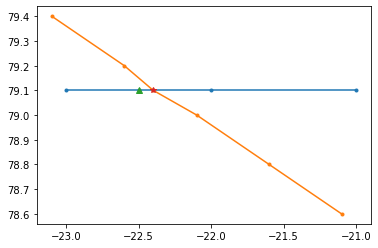

In [105]:
import matplotlib.pyplot as plt

fig = plt.figure
plt.plot(tpoints[:,1],tpoints[:,0],'.-')
plt.plot(qpoints[:,1],qpoints[:,0],'.-')
plt.plot(tpoints[tpt_idx,1],tpoints[tpt_idx,0],'^')
plt.plot(qpoints[qpt_idx,1],qpoints[qpt_idx,0],'*')